## Using Grover search for boolean satisfiability

Compiled by Patrick Mensac (patrick_mensac@fr.ibm.com)


1. [Grover Search ](#grover-search)<br/> 
    1.1 [Grover algorithm](#grover-algorithm)<br/>
    1.2 [Quantum Oracle function](#quantum-oracle)<br/>
    1.3 [Grover Operator](#grover-operator)<br>
    1.4 [Boolean Satisfiability](#boolean-satisfiability)<br/>
    1.4 [General 3-sat](#general-3sat)<br>         
2. [Throwing a party while avoiding the drama](#example-party)<br/>
3. [Card finding problem](#example-card-finding)<br/>
    3.1 [Execute on simulator backend](#grover-simulator)<br/>
    3.2 [Execute on real backend](#grover-real)<br/>
    3.3 [Error mitigation](#grover-mitigation)<br/>

           
# Grover search <a id='grover-search'></a>
From source https://arxiv.org/abs/1804.03719

Grover's algorithm can be used to 
- Solve decision problems (Is the formula true ? ) $(Satisfiability)$
- Find "$with$ $a$ $good$ $probability$" a specific $item$ within a randomly ordered database of $N$ items using $O(√N)$ operations. Quadratic speedup over classical algorithm.
- For a classical computer, this takes linear $O(N)$ time, because to prove that it doesn’t you have to look at all $N$ values, and if it does once then on average you need to look at $N/2$ values to find it. So the fact that the list is unsorted and unstructured is important.
    - Note that if the list is sorted it would only take $O(log(n))$ time, 
    - And if the values were in a hash table only constant $O(1)$


Grover’s algorithm allows you to tell whether a particular value exists in $O(√N)$ steps. 
This quadratic speedup comes in the $number$ of $oracle$ $calls$, where one oracle call gives us only the information whether the questioned-about element is the target one or not


# *Grover Algorithm* <a id='grover-algorithm'></a>
The Grover algorithm is made of a $state$ $preparation$, a $quantum$ $Oracle$ and a $grover$ $Operator$.
 1. Begin with uniform superposed state (i.e. Hadamard gate applied to |00000>). All possible $x$ values have the same amplitudes
 
 2. Apply the $Oracle$ (flip amplitude of state that matches search criterion). The query with $​U​f​$ , a unitary transformation that flips the amplitude of the marked item: $​U​f​ |​x​⟩ = (-1)​f​(​x​)​ |​x​⟩$.
 
 3. Reverse the sign of all states except $|0>$ which represents the mean. Next we apply a unitary matrix $​D​$ (3), which has the effect of flipping all $​N​$ amplitudes about the mean amplitude.
 
 4. Go to step $2$
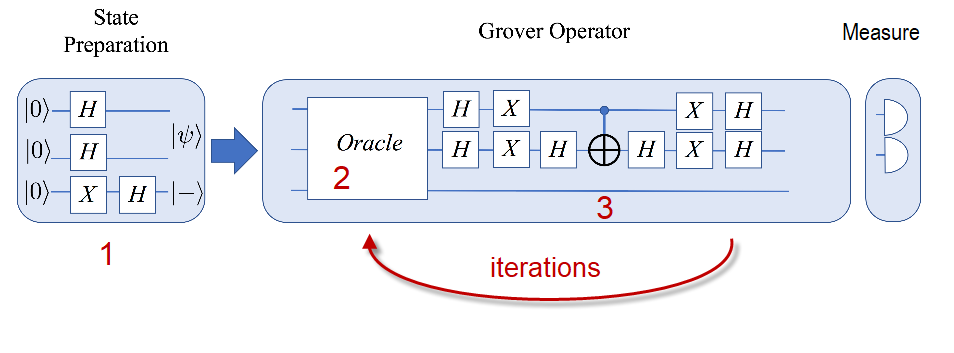

# *Quantum Oracle (Boolean Oracle - Phase Oracle)*<a id='quantum-oracle'></a>


Suppose there is a quantum black box which can transform the quantum state $x$ into $f(x)$. The quantum black box is a unitary operation, defined by its action on the computational basis: $𝑈: |𝑥|𝑦⟩→|𝑥|𝑦⨁𝑓(𝑥)⟩$.

- Grover's algorithm requires a $"quantum$ $oracle"$ operator $Uω$, which can recognize solutions to the search problem and give them a negative sign. The oracle contains a function $f$ that returns $f(x)=1$ if $|x⟩$ is a solution to the search problem and $f(x)$ $=$ $0$ otherwise. 


  #### The action of the oracle can then be represented as $U$$|x⟩$$|q⟩$ =$|x⟩$$|q$$⊕f(x)⟩$ where $f(x)$ returns 1 if $x$ is the marked item
  
 
 - $|𝑥⟩$ is the index register,
 - $⨁$ denotes addition modulo 2
 - The Oracle qubit $|q⟩$ is a single qubit which is flipped if $f(x)$=$1$ and is $unchanged$ otherwise

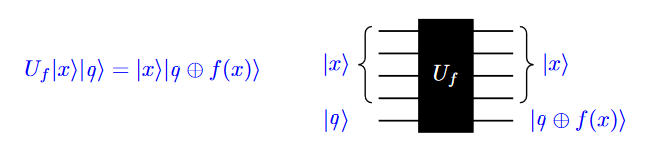

- Implementing the Quantum Oracle can be reduced to constructing a quantum circuit that flips an ancillary qubit $q$ (called the oracle qubit) if the function, $f(x)$, evaluates to $1$ for an input $x$. The function $f(x)$ is defined by

    - $f(x)\ = \ 1 ,  \ \  if  \ x \ = \ x^*  \ \  \ \rightarrow  \ \  so \ x \ IS \ the \ solution \ to \ the \ search \ problem $
    - $ f(x)\ = \ 0 ,  \ \  if  \ x \ \neq \ x^* \ \  \ \rightarrow  \ \  so \ x \ IS \ NOT \ the \ solution \ to \ the \ search \ problem $      
     ( $x^*$ being the item sought )

### *Quantum Phase Oracle* 
   
- Inputting $\dfrac{1 }{\sqrt{2}}(|0⟩-|1⟩)$ on the oracle qubit ($phase$ $kick-back$ trick), has the net effect of just implementing a $phase$ on the $marked$ item.  
               
    - For any $|x⟩$ with $f(x)$ $=$ $0$, its amplitude does not change. Otherwise, the amplitude is changed to $negative$. This means that the Oracle negates the probability amplitude of the input state $∣x⟩$ if and only if $f(x)=1$.
    
         - Starting state $\longrightarrow$  $|x⟩ ⊗ |-⟩ = |x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩-|1⟩) = \quad \boxed{\dfrac{{1 }}{\sqrt{2}}(|x0⟩-|x1⟩)}$ 
          
         - After we pass the Oracle ,we have 2 cases 
         
             - if $f(x)$= $0$ the state is unchanged $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩ ⊕|0⟩ - |1⟩ ⊕|0⟩)$ = $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩ - |1⟩)$
             - if $f(x)$= $1$ the state is $\longrightarrow$ $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩⊕|1⟩ - |1⟩⊕|1⟩)$ = $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|1⟩ - |0⟩)$ = $\quad \boxed{ \dfrac{{1 }}{\sqrt{2}}(|x1⟩-|x0⟩)}$
 
    if we choose  $q = H|1⟩ = \frac{{1 }}{\sqrt{2}}(|1⟩-|0⟩)$     then     $|x⟩|q⟩ \stackrel{\rm{Oracle}}{\longrightarrow}\ (-1)^{f(x)}|x⟩|q⟩ $   
    what
    
    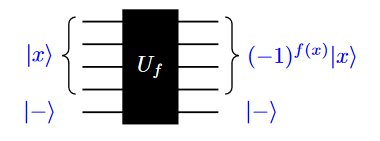

    
 in other words, the Phase oracle is a unitary operator $U$ satisfying 
    $$\ \boxed{U|x〉= (−1)f(x)|x〉= \begin{cases}-|x⟩ & \text{if $x$ is marked} \\|x⟩  & \text{if $x$ is not marked}\end{cases}}$$
    
        
### *General phase Kick-back trick explanation* 
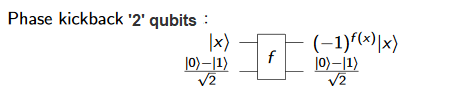

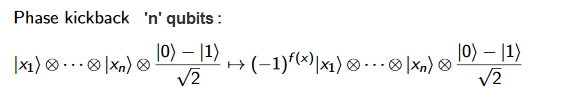
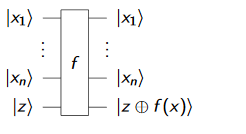
    


### *Quantum Oracle action example with 3 qubits*

<b>1. &nbsp; &nbsp;</b>   Apply Hadamard gates to $3$ qubits initialised to $|000⟩$ to create a uniform superposition. We get the $|\psi⟩$ state: $$|ψ⟩= H^{⊗n}|0⟩^{⊗n} = \frac{1}{\sqrt{2{^n}}}\sum_{x=0}^{2^n-1}|x⟩$$  With $n$=$3$ we end with : $$|ψ⟩=\frac{{1 }}{\sqrt{8}}(|000⟩+|001⟩+|010⟩+|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)$$

   ($3$ $qubits$ --> $N$ = $2^n$ = $8$) to obtain equal amplitudes associated with each state of $\frac{1}{\sqrt{N}}$ = $\frac{1}{\sqrt{8}}$ = $\frac{1}{2\sqrt{2}}$, and thus also equal probability of being in any of the $8$ possible states.
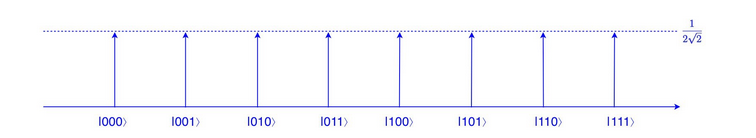


<b>2. &nbsp; &nbsp;</b>  Mark states $|011⟩$ using a $phase$ oracle. We get :
$$|ψ⟩=\frac{{1 }}{\sqrt{8}}(|000⟩+|001⟩+|010⟩-|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)$$

- In the example below, $f(011)$ = $1$ after applying the $Oracle$ $function$, The oracle query will negate the amplitude of the state (in this case $|011⟩$), giving the geometric representation  (this is the $phase-shift$ $operator$):

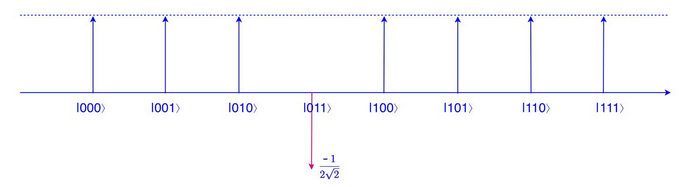



- The table below gives an example of 3(4) qubits (Boolean and phase) Oracles circuits to provide a single solution with Grover (source : https://arxiv.org/pdf/1703.10535.pdf) 

 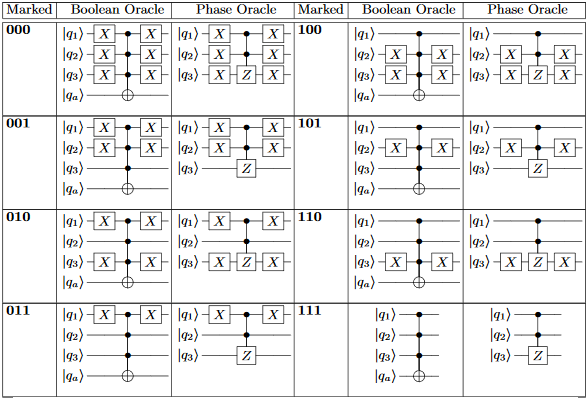
 
    

# *Quantum Oracle (Boolean Oracle - Phase Oracle)*<a id='quantum-oracle'></a>


Suppose there is a quantum black box which can transform the quantum state $x$ into $f(x)$. The quantum black box is a unitary operation, defined by its action on the computational basis: $𝑈: |𝑥|𝑦⟩→|𝑥|𝑦⨁𝑓(𝑥)⟩$.

- Grover's algorithm requires a $"quantum$ $oracle"$ operator $Uω$, which can recognize solutions to the search problem and give them a negative sign. The oracle contains a function $f$ that returns $f(x)=1$ if $|x⟩$ is a solution to the search problem and $f(x)$ $=$ $0$ otherwise. 


  #### The action of the oracle can then be represented as $U$$|x⟩$$|q⟩$ =$|x⟩$$|q$$⊕f(x)⟩$ where $f(x)$ returns 1 if $x$ is the marked item
  
 
 - $|𝑥⟩$ is the index register,
 - $⨁$ denotes addition modulo 2
 - The Oracle qubit $|q⟩$ is a single qubit which is flipped if $f(x)$=$1$ and is $unchanged$ otherwise

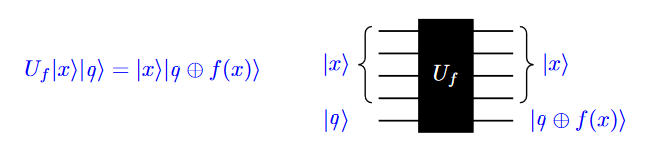

- Implementing the Quantum Oracle can be reduced to constructing a quantum circuit that flips an ancillary qubit $q$ (called the oracle qubit) if the function, $f(x)$, evaluates to $1$ for an input $x$. The function $f(x)$ is defined by

    - $f(x)\ = \ 1 ,  \ \  if  \ x \ = \ x^*  \ \  \ \rightarrow  \ \  so \ x \ IS \ the \ solution \ to \ the \ search \ problem $
    - $ f(x)\ = \ 0 ,  \ \  if  \ x \ \neq \ x^* \ \  \ \rightarrow  \ \  so \ x \ IS \ NOT \ the \ solution \ to \ the \ search \ problem $      
     ( $x^*$ being the item sought )

### *Quantum Phase Oracle* 
   
- Inputting $\dfrac{1 }{\sqrt{2}}(|0⟩-|1⟩)$ on the oracle qubit ($phase$ $kick-back$ trick), has the net effect of just implementing a $phase$ on the $marked$ item.  
               
    - For any $|x⟩$ with $f(x)$ $=$ $0$, its amplitude does not change. Otherwise, the amplitude is changed to $negative$. This means that the Oracle negates the probability amplitude of the input state $∣x⟩$ if and only if $f(x)=1$.
    
         - Starting state $\longrightarrow$  $|x⟩ ⊗ |-⟩ = |x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩-|1⟩) = \quad \boxed{\dfrac{{1 }}{\sqrt{2}}(|x0⟩-|x1⟩)}$ 
          
         - After we pass the Oracle ,we have 2 cases 
         
             - if $f(x)$= $0$ the state is unchanged $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩ ⊕|0⟩ - |1⟩ ⊕|0⟩)$ = $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩ - |1⟩)$
             - if $f(x)$= $1$ the state is $\longrightarrow$ $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|0⟩⊕|1⟩ - |1⟩⊕|1⟩)$ = $|x⟩ ⊗ \dfrac{{1 }}{\sqrt{2}}(|1⟩ - |0⟩)$ = $\quad \boxed{ \dfrac{{1 }}{\sqrt{2}}(|x1⟩-|x0⟩)}$
 
    

   - If we choose  $q = H|1⟩ = \frac{{1 }}{\sqrt{2}}(|1⟩-|0⟩)$     then     $|x⟩|q⟩ \stackrel{\rm{Oracle}}{\longrightarrow}\ (-1)^{f(x)}|x⟩|q⟩ $   
   
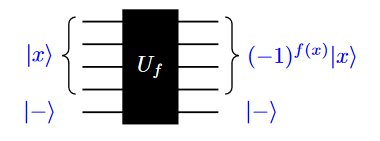   
 - In other words, the Phase oracle is a unitary operator $U$ satisfying 
    $$\ \boxed{U|x〉= (−1)f(x)|x〉= \begin{cases}-|x⟩ & \text{if $x$ is marked} \\|x⟩  & \text{if $x$ is not marked}\end{cases}}$$

### *General phase Kick-back trick explanation* 
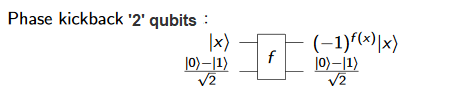

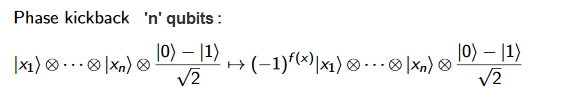

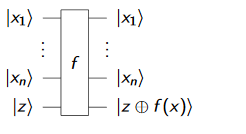

    


### *Quantum Oracle action example with 3 qubits*

<b>1. &nbsp; &nbsp;</b>   Apply Hadamard gates to $3$ qubits initialised to $|000⟩$ to create a uniform superposition. We get the $|\psi⟩$ state: $$|ψ⟩= H^{⊗n}|0⟩^{⊗n} = \frac{1}{\sqrt{2{^n}}}\sum_{x=0}^{2^n-1}|x⟩$$  With $n$=$3$ we end up with : $$|ψ⟩=\frac{{1 }}{\sqrt{8}}(|000⟩+|001⟩+|010⟩+|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)$$

   ($3$ $qubits$ --> $N$ = $2^n$ = $8$) to obtain equal amplitudes associated with each state of $\frac{1}{\sqrt{N}}$ = $\frac{1}{\sqrt{8}}$ = $\frac{1}{2\sqrt{2}}$, and thus also equal probability of being in any of the $8$ possible states.
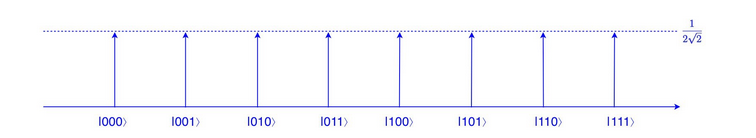



<b>2. &nbsp; &nbsp;</b>  Mark states $|011⟩$ using a $phase$ oracle. We get :
$$|ψ⟩=\frac{{1 }}{\sqrt{8}}(|000⟩+|001⟩+|010⟩-|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)$$

- In the example below, $f(011)$ = $1$ after applying the $Oracle$ $function$, The oracle query will negate the amplitude of the state (in this case $|011⟩$), giving the geometric representation  (this is the $phase-shift$ $operator$):
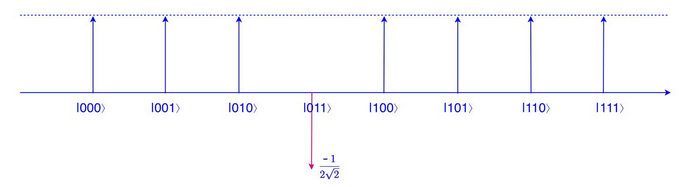



- The table below gives an example of 3(4) qubits (Boolean and phase) Oracles circuits to provide a single solution with Grover (source : https://arxiv.org/pdf/1703.10535.pdf) 
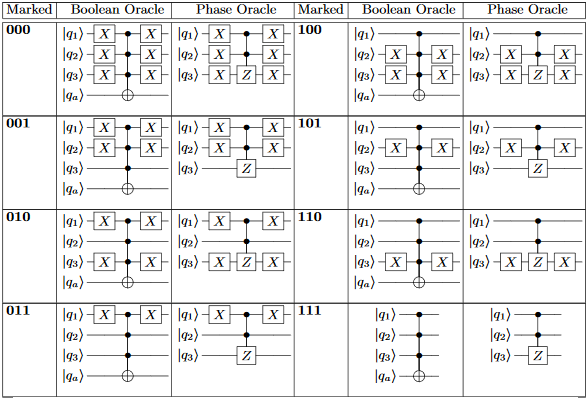
  

#  *The Grover Operator or  "Diffusion  Transform  Operator"*  <a id='grover-operator'></a>


 - The Grover diffusor Operator $G$ can be seen as : $G= (2|\psi〉〈\psi| -I) \ O$.
     - $O$ is the $Oracle$
     - $ (2|\psi〉〈\psi| -I)$ is the $conditional$ $phase$ $shift$
                 
 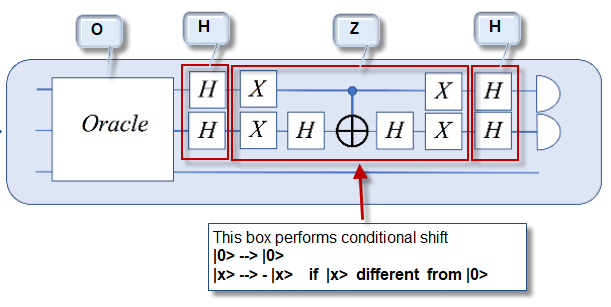
 
     

   
     
 - The Grover Operator can be expressed using quantum gates as $G=(HZH) \ O$ 
     - $O$ is the Oracle     
     - $H$ is the Hadamard transform   
     - $Z$ is the "Zero Phase shift" operator defined as $Z=2|0〉〈0|−I$ 
         - The set $Hadamards$ and $Control$ $NOT$ are equivalent to $Z$ gate         
         
       - This operator applied to state $|0> $does nothing: 
       
           $(2|0〉$ $〈0|−I)$ $|0〉$ = $ 2$ $|0〉$ $〈0|0〉$ −$I|0〉$=$|0〉$
                   
       - This operator applied to state $|x>$  
       
           $(2|0〉$ $〈0|−I)$ $|x〉$ = $ 2$ $|0〉$ $〈0|x〉$ −$I|x〉 $ = $−|x〉$
                  
  
            
    
- This diffusion transform consists then of an application of the $Hadamard$ $transform$ $H⊗n$, followed by the conditional phase shift $Z$ that shifts every state except $|0⟩$ $by−1$, followed by yet another $Hadamard$ $transform$ $H⊗n$. 


- The conditional phase shift can be represented by the unitary operator $2|\psi〉〈\psi|−I$. Since $|Ψ〉$ is the uniform superposition over $N= 2^n$ 

So after the first Grover iteration we have the following: 

- After having applied the $Oracle$, (the amplitude changed to negative for the searched $item$)  
    - The average amplitude decreased. 
    
- Applying the Grover Operator will then flip every amplitude around the average
    - Thus increasing the amplitude of the searched $item$ and lowering the others. 
    

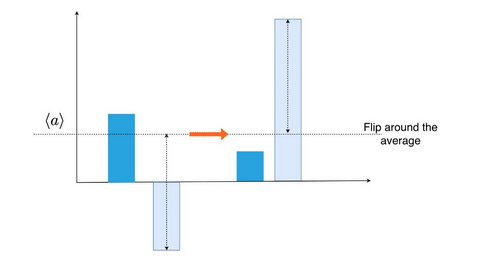
         
  

## *let's see mathematically. If we start with 3 qubits*

The original state $|\psi〉$ being : $|ψ⟩= H^{⊗n}|0⟩^{⊗n} = \dfrac{1}{\sqrt{2{^n}}}\sum_{x=0}^{2^n-1}|x⟩$$  \ \ --> \ \
$$|ψ⟩=\dfrac{{1 }}{\sqrt{8}}(|000⟩+|001⟩+|010⟩+|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)$

- Then we apply the Oracle. We get : 
$|ψ⟩ =  \dfrac{{1}}{\sqrt{8}}(|000⟩+|001⟩+|010⟩+|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)$ - $\dfrac{{2 }}{\sqrt{2}}(|011⟩)$  

    - This can be written as $\bigg[|ψ⟩ - \dfrac{{2 }}{\sqrt{2}}(|011⟩)\bigg]$
    
    

- Then applying the Grover Operator is: 
$$2\bigg[|ψ〉〈ψ| - I\bigg]\bigg[|ψ⟩ - \dfrac{{2 }}{\sqrt{2}}(|011⟩)\bigg] =  2|ψ〉  〈ψ|ψ〉- |ψ〉 - \dfrac{{2 }}{\sqrt{2}}(|ψ〉〈ψ|011⟩) + \dfrac{{1 }}{\sqrt{2}}(|011⟩)$$ 

    - with =$〈ψ|001〉= \dfrac{{1 }}{2\sqrt{2}}$  then :$$ =  2|ψ〉-|ψ〉 - \dfrac{{2 }}{\sqrt{2}}(|ψ⟩)(\dfrac{{1 }}{2\sqrt{2}}) + \dfrac{{1 }}{\sqrt{2}}(|011⟩) = \dfrac{{1 }}{2}|ψ〉+ \dfrac{{1 }}{\sqrt{2}}(|011⟩$$

    - Then we replace $|ψ〉$, we have :
$$ =  \dfrac{{1}}{2}\bigg[\dfrac{{1}}{\sqrt{8}}(|000⟩+|001⟩+|010⟩+|011⟩+|100⟩+|101⟩+|110⟩+|111⟩)\bigg] + \dfrac{{2}}{\sqrt{2}}(|011⟩)$$

    - This can be written as: $$\bigg[\dfrac{{1}}{4\sqrt{2}}(|000⟩+|001⟩+|010⟩+|100⟩+|101⟩+|110⟩+|111⟩)\bigg] + \dfrac{{5}}{4\sqrt{2}}|011⟩$$





   - This leads to this superposition state: 
   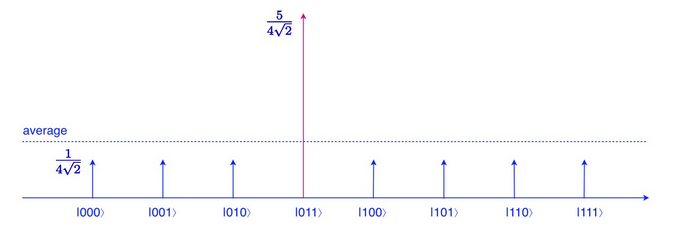


- So we repeat this process square root times N (${\sqrt{N}}$) to amplify the amplitude of the right answer.

# Graphical representation of Grover Iteration

The Grover iterate $G$ is a rotation through an angle $2\theta$ in the direction from $|\psi〉$ to  $|\beta〉$. The angle betwwen $|\psi$〉and $|\theta〉$ is ${pi}/{2} $ 

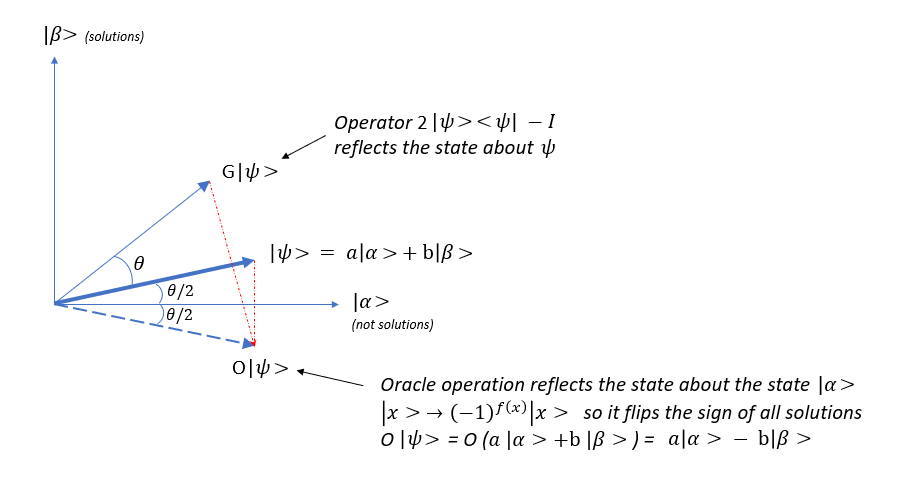
  

### Grover example with 2 qubits 
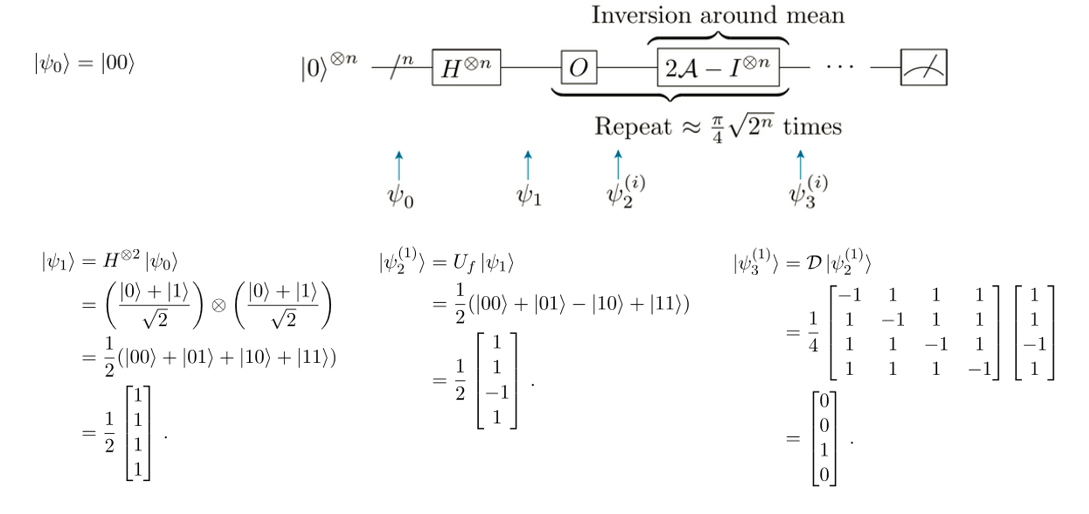

## Below we can see the conditional shift in action on 3 qubits using qiskit


$$ \text{Statevector = }\begin{bmatrix}
0.70711 \\
0 \\
0.70711 \\
0 \\
0 \\
0 \\
0 \\
0\end{bmatrix} $$

This are the vectors states for the 3 qubits - qubit0 and qubit2 are |0> while qubit1 is |+>


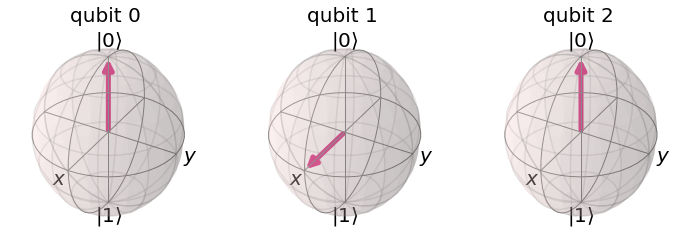

In [20]:
###### from utils import *
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit import *

controls = QuantumRegister(3, "ctr_qubits")
ancillas = QuantumRegister(1, "ancilla_qubits")
measures = ClassicalRegister(3, "measure_cbits")
circuit = QuantumCircuit(controls, measures)

###########  intialisation 
# put a non zero on qubit1 
circuit.h(range(1,2))
circuit.barrier()
#circuit.measure([0,1,2],[0,1,2])
circuit.draw()
import utils 
from sympy import Matrix
from utils import vector2latex
from qiskit.visualization import plot_bloch_multivector

simulator = Aer.get_backend('statevector_simulator')
job = execute (circuit, backend=simulator)
result = job.result()
counts = result.get_statevector()
statevector=vector2latex(counts, pretext="\\text{Statevector = }")
# Matrix(counts)
print("This are the vectors states for the 3 qubits - qubit0 and qubit2 are |0> while qubit1 is |+>")
plot_bloch_multivector(counts)


$$ \text{Statevector = }\begin{bmatrix}
-0.70711 \\
0 \\
0.70711 \\
0 \\
0 \\
0 \\
0 \\
0\end{bmatrix} $$

We can notice qubit 1 were changed from |+> to |-> 


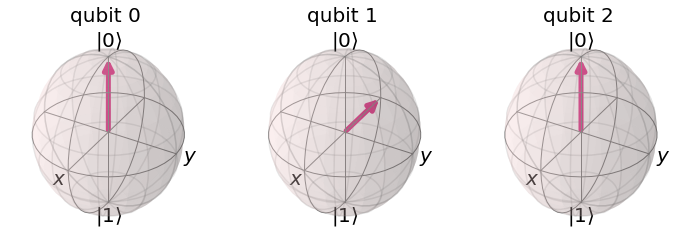

In [19]:
controls = QuantumRegister(3, "ctr_qubits")
ancillas = QuantumRegister(1, "ancilla_qubits")
measures = ClassicalRegister(3, "measure_cbits")
circuit = QuantumCircuit(controls, measures)

###########  intialisation 
# put a non zero on qubit1 
circuit.h(range(1,2))
circuit.barrier()

########### grover phase shift ############
circuit.x(range(0,3))
circuit.barrier()
# implementing a CtrlZ gate using H and CNOT gates 
circuit.h(controls[2])   # ctrlZ
circuit.ccx(controls[0], controls[1], controls[2])# ctrlZ
circuit.h(controls[2])   # ctrlZ

circuit.barrier()
circuit.x(range(0,3))

circuit.barrier()
# ctrl Z can also be implemented as an mcu1 gate in qiskit
# circuit.mcu1(np.pi, [controls[0],controls[1]], controls[2])

circuit.draw(output='mpl')
# simulator = Aer.get_backend('qasm_simulator')
import utils 
from sympy import Matrix
from utils import vector2latex
from qiskit.visualization import plot_bloch_multivector

simulator = Aer.get_backend('statevector_simulator')
job = execute (circuit, backend=simulator)
result = job.result()
counts = result.get_statevector()
statevector=vector2latex(counts, pretext="\\text{Statevector = }")

print("We can notice qubit 1 were changed from |+> to |-> ")
# Matrix(counts)
plot_bloch_multivector(counts)



# *Boolean Satisfiability - Abbreviated "SATISFIABILITY or SAT"* <a id='boolean-satisfiability'></a>


What's SAT in general. SAT is satisfiability problem. 
You have Boolean expression written using only $AND$, $OR$, $NOT$, $variables$, and $parentheses$. 
- The SAT problem is: 
 - Given the expression, is there some assignment of $TRUE$ and $FALSE$ values to the variables that will make the entire expression $true$? 
 - For example the boolean expression $x1∧x2∨x3$ is there such values of $x1$, $x2$, $x3$, that given Boolean expression is TRUE ? 
      - The answer to SAT problem is only YES or NO



#### *Satisfiable or not satisfiable ?*

The variables of a given Boolean formula can be consistently replaced by the values $TRUE$ or $FALSE$ in such a way that the formula evaluates to $TRUE$. 
- If this is the case, the formula is called $satisfiable$.
- On the other hand, if no such assignment exists, the function expressed by the formula is $FALSE$ for all possible variable assignments and the formula is $unsatisfiable$. 
- For example, the formula $($$a$ $AND$ $NOT$ $b$$)$ is $satisfiable$ because one can find the values $a$ = $TRUE$ and $b$ = $FALSE$, which make $(a$ $AND$ $NOT$ $b)$ = $TRUE$. In contrast, $(a$ $AND$ $NOT$ $a)$ is $unsatisfiable$. 

- #### *Question : Are those formulas satisfiable or not ?*
    
 - 1) $( p ∧ q ) ∨ ¬ p$

 - 2) $( p ∧ ¬ p )$

    $1$ is satisfiable if $p$ is $False$, the formula is evaluated to $True$
    
    $2$ is $NOT$ satisfiable as no value of $p$ can make the formula evaluated to $True$



### *General 3-SAT problem* <a id='general-3sat'></a>
3-SAT has a certain structure to the way the variables are evaluated based on conjunctive normal form
3-SAT problems are usually expressed in Conjunctive Normal Forms (CNF) and written in the DIMACS-CNF format. For example:


In [21]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf  3 5
-1 -2 -3 0
 1 -2  3 0
 1  2 -3 0
 1 -2 -3 0
-1  2  3 0
'''


The CNF of this 3-SAT instance contains $3$ variables and $5$ clauses:

$(\neg v_1 \vee \neg v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee v_3) \wedge (v_1 \vee v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee \neg v_3) \wedge (\neg v_1 \vee v_2 \vee v_3)$

It can be verified that this 3-SAT problem instance has three satisfying solutions:
$(v_1, v_2, v_3)$ = $(T, F, T)$ or $(F, F, F)$ or $(T, T, F)$

Or, expressed using the DIMACS notation: 
`1 -2 3`, or `-1 -2 -3`, or `1 2 -3`.

With this example problem input, we then create the corresponding `oracle` for our `Grover` search. In particular, we use the `LogicalExpressionOracle` component provided by Aqua, which supports parsing DIMACS-CNF format strings and constructing the corresponding oracle circuit.

### *1-Exclusive 3-SAT problem*  (from qiskit tutorials)
The 1-Exclusive SAT problem is a satisfiability problem, in which a solution must satisfy every clause, with only one condition being True for each clause. As an example, consider the following instance :
$$ (x_1 \vee x_2 \vee \neg x_3) \wedge (\neg x_1 \vee \neg x_2 \vee \neg x3) \wedge (\neg x_1 \vee x_2 \vee x_3)$$

The unique solution to this instance is $x_1 = True, x_2 = False, x_3 = True$



### *How difficult is to implement one clause ?*   

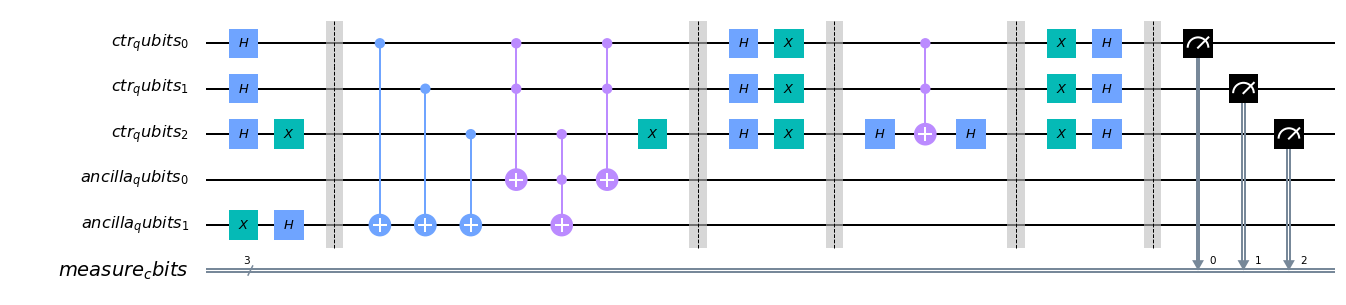

In [22]:
# Example of implementing one clause with 3 literals as Oracle and using the Grover Operator 
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit import *

controls = QuantumRegister(3, "ctr_qubits")
ancillas = QuantumRegister(2, "ancilla_qubits")
measures = ClassicalRegister(3, "measure_cbits")
circuit = QuantumCircuit(controls, ancillas, measures)


########### Initialization ############
circuit.h([0,1,2])
circuit.x(controls[2])  # ¬x2 
# Phase kickback
circuit.x(ancillas[1])
circuit.h(ancillas[1])  
circuit.barrier()

########### Oracle definition ############
# Clause y =(x0 ∨ x1 ∨ ¬x2) 
# y = x0 ⊗ x1 ⊗ x2 ⊗ (x0 ∧ x1 ∧ ¬x2)
# circuit.x(controls[2])  # ¬x2 
circuit.cx(controls[0],ancillas[1]) # x0 ⊗ x1 ⊗ x2 
circuit.cx(controls[1],ancillas[1]) # x0 ⊗ x1 ⊗ x2 
circuit.cx(controls[2],ancillas[1]) # x0 ⊗ x1 ⊗ x2 

# x0 ∧ x1 ∧ ¬x2
circuit.ccx(controls[0],controls[1],ancillas[0])
circuit.ccx(controls[2],ancillas[0],ancillas[1])
circuit.ccx(controls[0],controls[1],ancillas[0])

# x0 ∧ x1 ∧ ¬x2 might be replaced 
# circuit.mct([controls[0],controls[1],controls[2]], ancilla[1], None, mode='advanced')

########### Reset qubit2 (x2) ############
circuit.x(2)
circuit.barrier()

########### grover diffusor operator ############
circuit.h(range(0,3))
circuit.x(range(0,3))
circuit.barrier()
# implementing a CtrlZ gate using H and CNOT gates 
circuit.h(controls[2])   # ctrlZ
circuit.ccx(controls[0], controls[1], controls[2]) # ctrlZ
circuit.h(controls[2])   # ctrlZ

circuit.barrier()
circuit.x(range(0,3))
circuit.h(range(0,3))
circuit.barrier()
# ctrl Z can also be implemented as an mcu1 gate in qiskit
# circuit.mcu1(np.pi, [controls[0],controls[1]], controls[2])

########### Measure qubits 0,1,2 ############ 
circuit.measure(controls, measures)
circuit.draw(output='mpl')


# Grover examples using Qiskit Aqua library 

# *Throwing a party while avoiding the drama* <a id='example-party'></a>

Imagine you are inviting some friends to a party, some who are couples, and some who are not on speaking terms. Specifically, **Alice** and **Bob** are in a relationship, as are **Carol** and **David**. However, **Alice** and **David** had a bad breakup a while ago and haven't been civil with each other since. And **Bob** doesn't want to meet **Carol** and **David** if he is alone. Armed with a quantum computer and Qiskit Aqua, how can you leverage Grover search algorithm to identify friendly combinations of people to invite?

Fortunately, Grover search may be used for [boolean satisfiability problems](https://en.wikipedia.org/wiki/Boolean_satisfiability_problem), and the constraints for our party planning problem may be formulated with the following boolean expression:

`((A and B) or (C and D)) and not (A and D) and not (B and C and D)`

A = Alice ;
B = Bob  ; 
C = Carol ; 
D = David ;

In [1]:
# Do the necessary import for our program
#!pip install qiskit-aqua
# %matplotlib notebook
from qiskit import Aer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle
from qiskit.tools.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.aqua import QuantumInstance
from utils import convert_to_card,convert_to_card_image,print_image
from matplotlib.pyplot import imshow
import numpy as np
from IPython.display import Image, display

Let's go ahead and use our expression in a Grover search to find out compatible combinations of people to invite.
> Note: We'll represent `and` with `&`, `or` with `|`, `not` with `~` in our expression. 

In [27]:
backend = Aer.get_backend('qasm_simulator')
log_expr = '((A & B) | (C & D)) & ~(A & D) & ~(B & C & D)'
oracle = LogicalExpressionOracle(log_expr, mct_mode='noancilla')

oracle.circuit.draw(output='mpl')

### Now we'll run the algorithm on a simulator, printing the result that occurred most often. This result is expressed as the numeric representations of our four friends; a minus sign indicating which ones Grover advised against inviting in that particular result.

In [28]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = Aer.get_backend('qasm_simulator')

# Can be done in 2 ways 
algorithm = Grover(oracle, mct_mode='noancilla')
result = algorithm.run(backend)
print(result['top_measurement'])
print(result)

In [29]:
full_circuit=algorithm.construct_circuit(measurement=True)
full_circuit.draw(output='mpl')


In [30]:
# Or creating a quantum instance first to pass some paramreters such as optimization_level
quantum_instance = QuantumInstance(backend, optimization_level=3, shots=8192)
result = algorithm.run(quantum_instance)
print(result['top_measurement'])

Finally, we'll plot the results. Each basis state represents our four friends, with the least significant bit representing Alice. If a bit is 1, then the advice is to invite the person that the bit represents. If the bit is 0, then Grover advises not to send an invitation.

In [31]:
legend = ['Alice -  Bob - Carol - David']
plot_histogram(result['measurement'], legend=legend)

# Card finding problem <a id='example-card-finding'></a>

### *As an example, we want to find the card which satisfy a serie of conditions which worth 0 or 1.*



We have a set of 32 cards, whose colors are $spade$, $club$, $diamond$ and $heart$. 
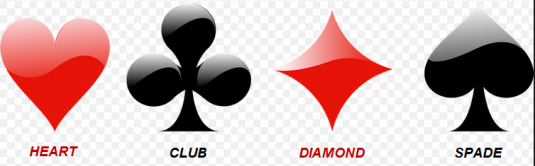


As in the $belote$ game, these cards are $7$, $8$, $9$, $10$, $J$, $Q$, $K$, $A$. 
Since we want to find a way to describe these cards with (simple) logical operators, we decide of additionnal properties to caracterize them. 
* First, the parity of the card, starting with the 7 (odd) up to the ace (even).
* Second, the value of the card if it was a trump suit card (which, in belote, can be separated between low values (7, 8, Q, K) and high values (10, A, 9, J)).
* It can seem far-stretched (because it is), but this facilitates the mapping, making explanations clearer. 

We thus have a way to describe any card with boolean caracteristics:
* $x_0$: is the card black ?
* $x_1$: is it either a club or a heart ? (depending on $x_0$)
* $x_2$: is its symbol a letter ? (ie J, Q, K, A)
* $x_3$: is its value high ? (ie 10, A, 9, J)
* $x_4$: is it odd ?

If we take as an example the $Queen$ $of$ $hearts$, it will be encoded with $x_0 = 0$ (red), $x_1 = 1$ (heart), $x_2 = 1$ (letter), $x_3 = 0$ (low value) and $x_4 = 0$ (even), thus $00110$.

In [2]:
# we look for the queen of heart 
expression='( ~x0 & x1 & x2 & ~x3 & ~x4 )'

In [3]:
Oracle=LogicalExpressionOracle(expression, mct_mode='noancilla', optimization=True)

#### Qiskit provides a method to draw the Oracle associated circuit : .circuit.draw() 
Use this method to draw the circuit associated with the Oracle you created 

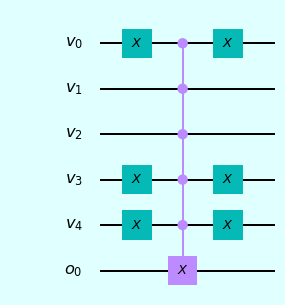

In [4]:
# Use the method .circuit.draw() to the Oracle to draw the associated circuit
style = {'backgroundcolor': 'lightcyan'}
Oracle.circuit.draw(output='mpl', style=style)


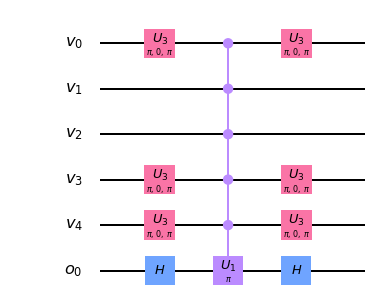

In [5]:
Oracle.circuit.decompose().draw(output='mpl')

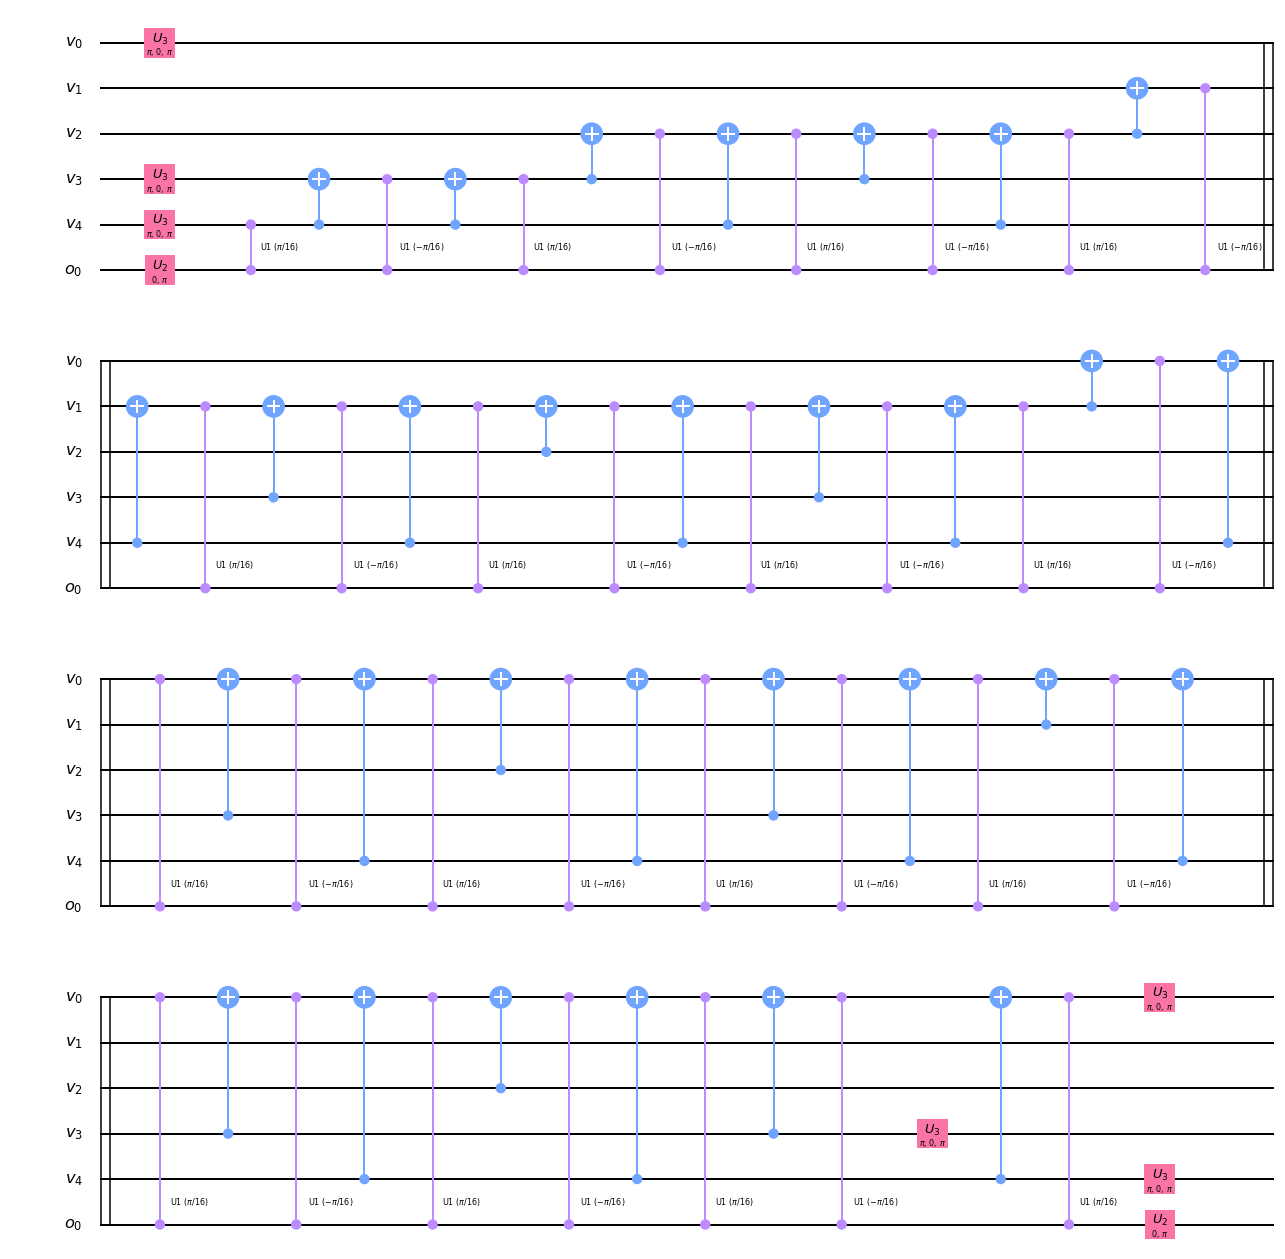

In [6]:
Oracle.circuit.decompose().decompose().draw(output='mpl')

### Now, invoke the Grover algorithm provided by Aqua using the Oracle you created previously <a id='grover-simulator'></a>

In [7]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = Aer.get_backend('qasm_simulator')

# invoke Grover algorythm using the Oracle
algorithm = Grover(Oracle, mct_mode='noancilla')

# execute Grover Algorithm
result = algorithm.run(backend)

The maximum amplitude is : 00110 , Queen of hearts


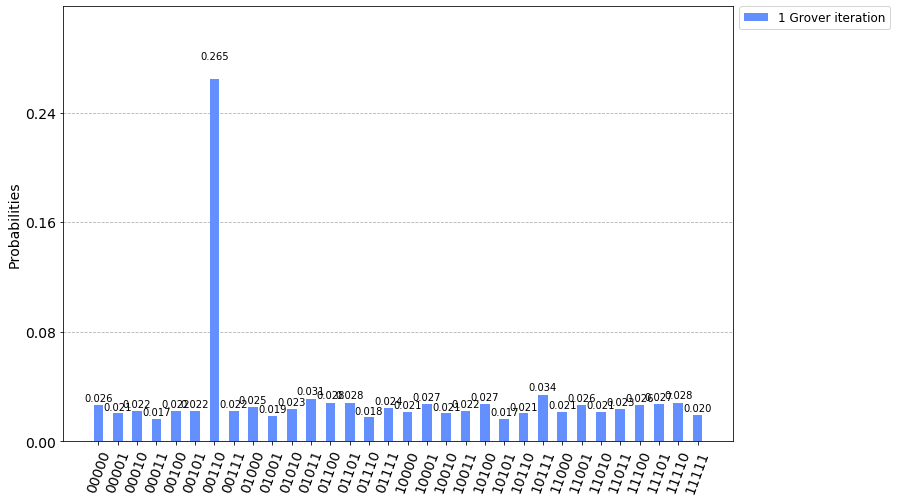

In [8]:
# plot the histogram of the measurents 
# print the top measurement results 
print('The maximum amplitude is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))
legend=['1 Grover iteration']
plot_histogram(result['measurement'], legend=legend, figsize=(12, 8))


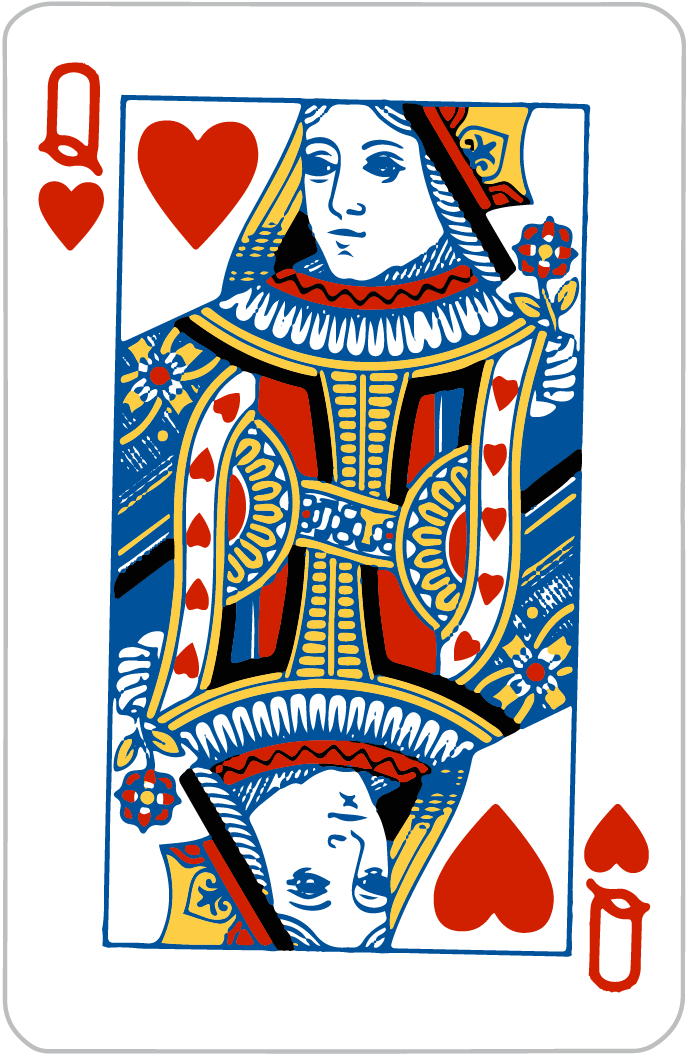

In [9]:
print_image(result['top_measurement'])

#### By default Grover iterations is set to 1. With 32 cards, what would be the optimal number of Grover iterations for having amplitudes to 0 for all of the other values than the one we are looking for?  
The optimum number of iterations that we'll call $m$ is directly linked to the number of Qubits of the circuit, and is 
$$m = \frac{\pi}{4}\sqrt{2^{N}}$$  with $N$ beeing the number of Qubits

The answer is : 00110 , Queen of hearts


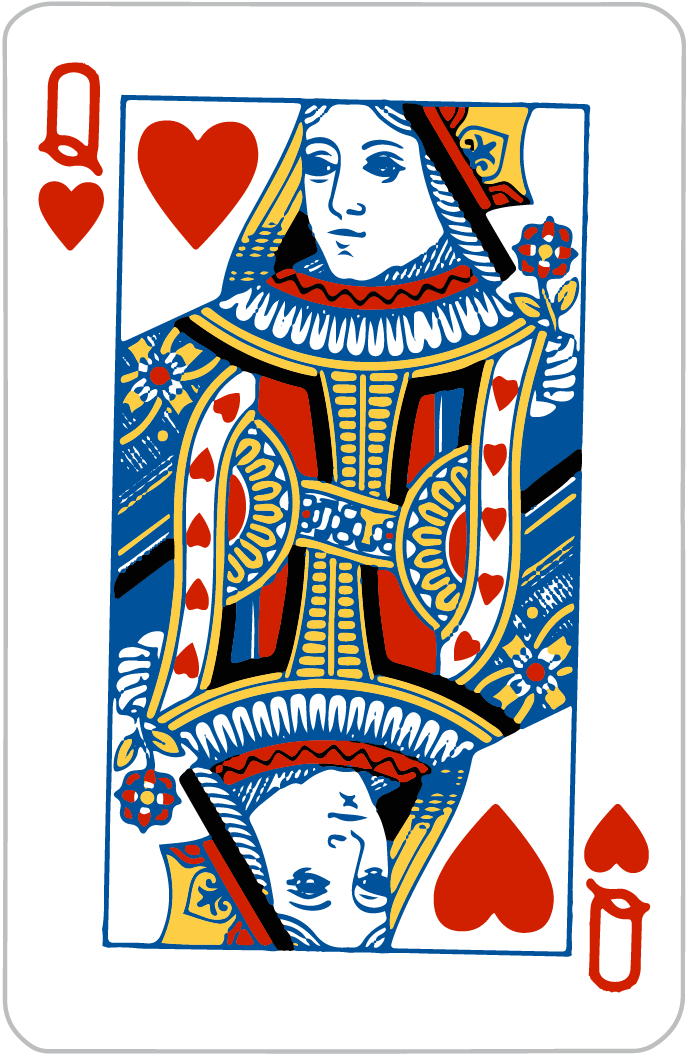

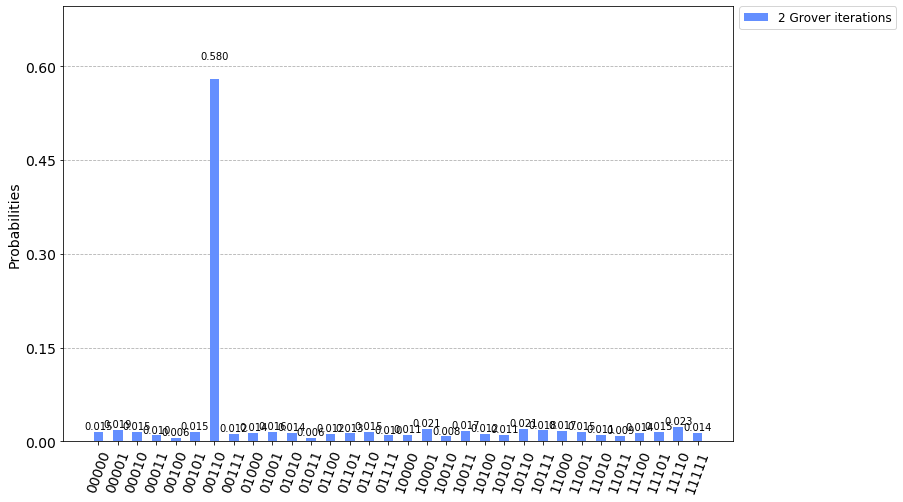

In [10]:
# Let's try with 2 iterations 
algorithm =Grover(Oracle, mct_mode='noancilla', num_iterations=2)

# execute Grover Algorithm
result = algorithm.run(backend)
print('The answer is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))

# plot histogram
print_image(result['top_measurement'])
legend=['2 Grover iterations']
plot_histogram(result['measurement'], legend=legend, figsize=(12, 8))

The answer is : 00110 , Queen of hearts


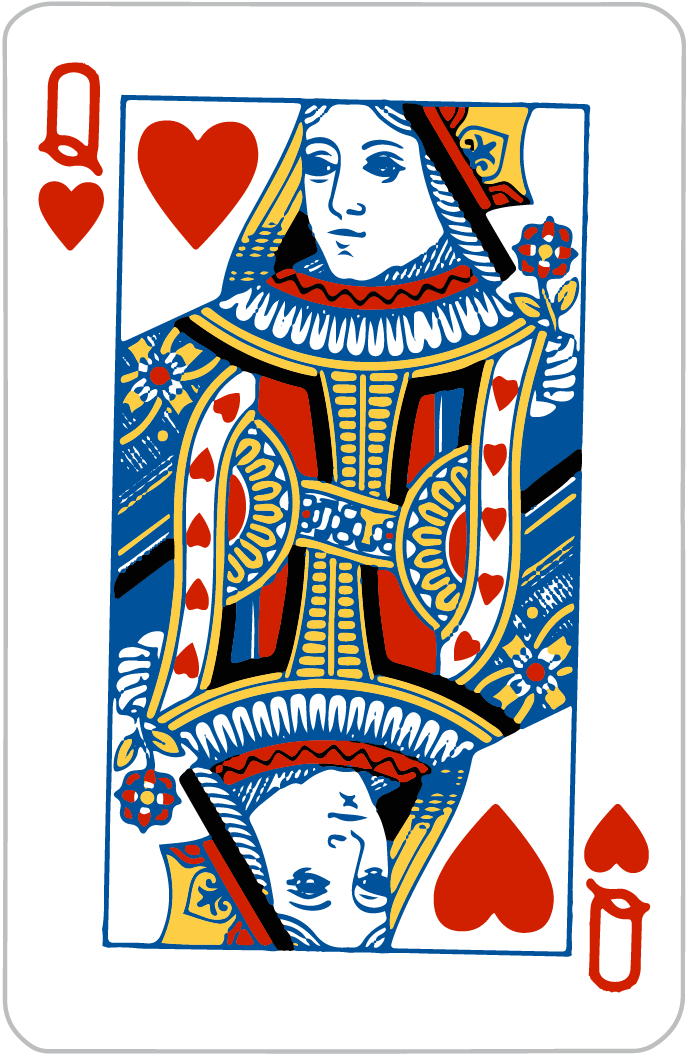

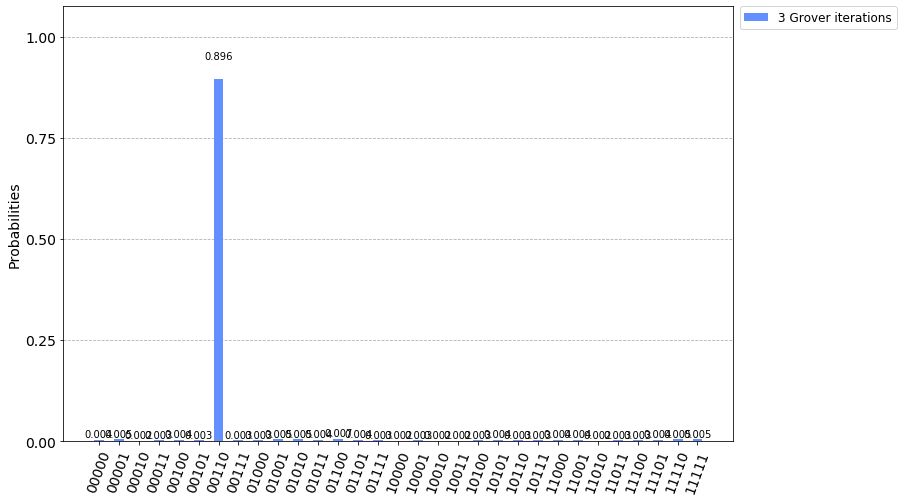

In [11]:
# invoke Grover algorythm using the Oracle and the number of iterations you define previously
# Let's try with 3 
algorithm =Grover(Oracle, mct_mode='noancilla', num_iterations=3)

# execute Grover Algorithm
result = algorithm.run(backend)
print('The answer is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))

# plot histogram
print_image(result['top_measurement'])
legend=['3 Grover iterations']
plot_histogram(result['measurement'], legend=legend, figsize=(12, 8))

The answer is : 00110 , Queen of hearts


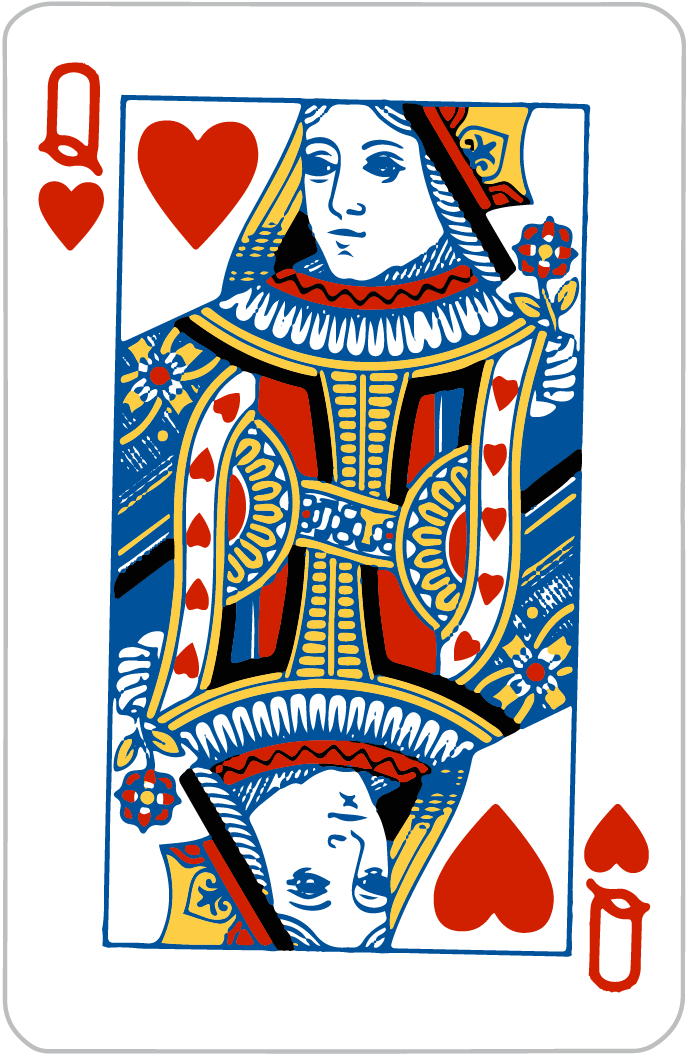

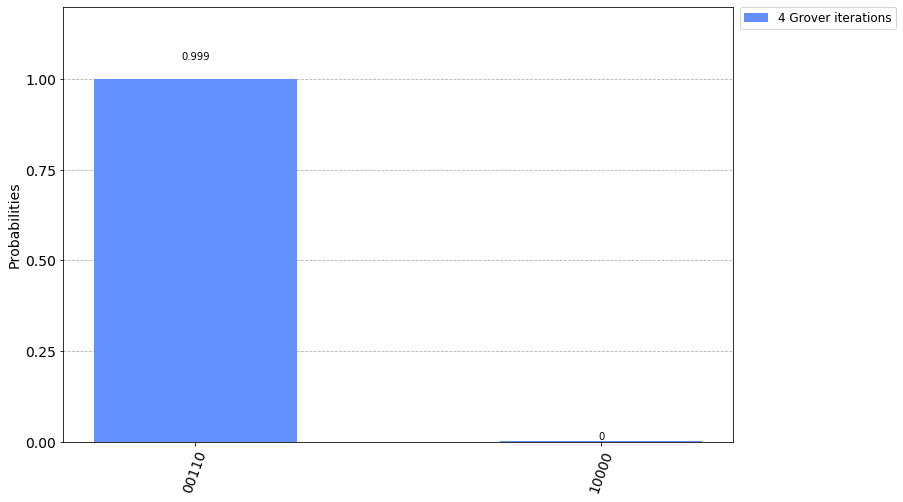

In [12]:
# invoke Grover algorythm using the Oracle and the number of iterations you define previously
# Let's try with 4 iterations 
algorithm =Grover(Oracle, mct_mode='noancilla', num_iterations=4)

# execute Grover Algorithm
result = algorithm.run(backend)
print('The answer is :',result['top_measurement'],',', convert_to_card(result['top_measurement']))

# plot histogram
print_image(result['top_measurement'])
legend=['4 Grover iterations']
plot_histogram(result['measurement'], legend=legend, figsize=(12, 8))

### Using Real Backend "IBMQ" 20 Qubits system <a id='grover-real'></a>

ibmqfactory.load_account:WARNING:2020-05-12 16:39:02,582: Credentials are already in use. The existing account in the session will be replaced.
The skip Qobj validation does not work for IBMQ provider. Disable it.


The answer is : 10001 , 7 of spades


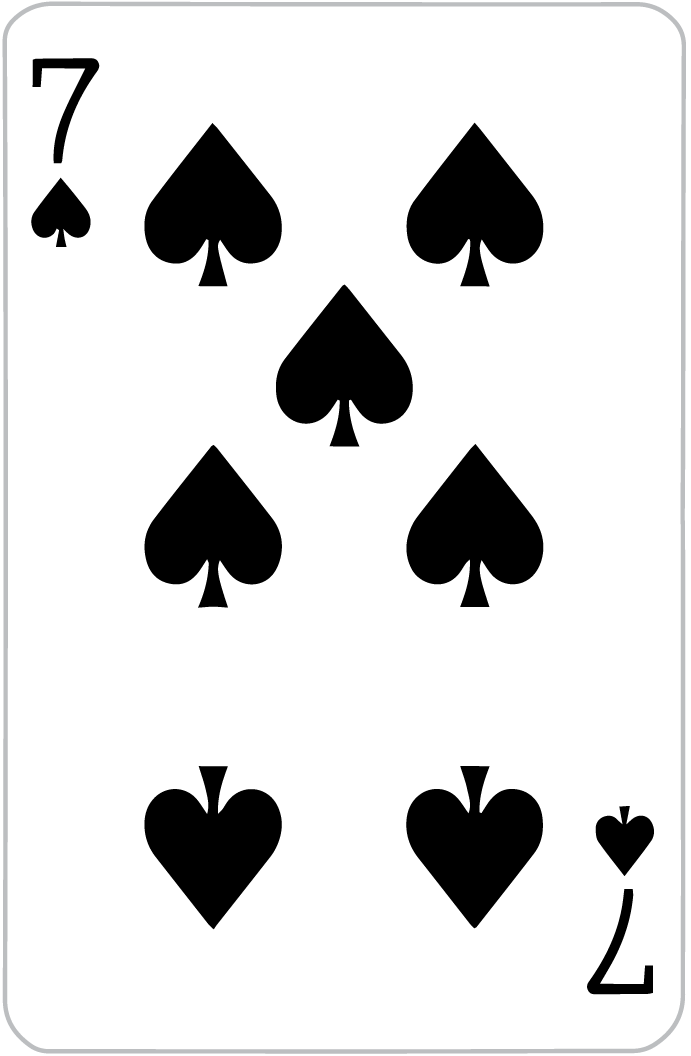

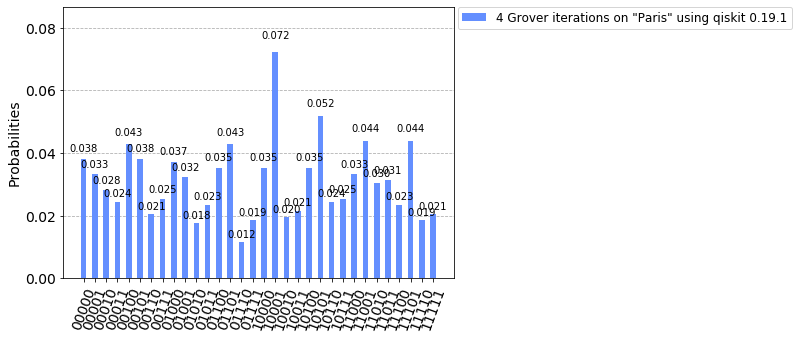

In [68]:
# Grover search 4 iterations 
from qiskit import IBMQ
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

backend=provider.get_backend('ibmq_paris')

# invoke Grover algorythm using the Oracle and the number of iterations you define previously
algorithm = Grover(Oracle, mct_mode='noancilla', num_iterations=4)

# execute Grover Algorithm
result_4iter = algorithm.run(backend)
print('The answer is :',result_4iter['top_measurement'],',', convert_to_card(result_4iter['top_measurement']))

# plot histogram
print_image(result_4iter['top_measurement'])
legend=['4 Grover iterations on "Paris" using qiskit 0.19.1']
plot_histogram(result_4iter['measurement'], legend=legend)

## for references - Grover on real backends 
Result of grover (4 iterations on Singapore) using qiskit 0.18.3
https://quantum-computing.ibm.com/results/5e69086ef75aa300124cd6e8

Result of Grover (4 iterations on Paris) using qiskit 0.19.1
https://quantum-computing.ibm.com/results/5ebab1fdf08d39001a320b77

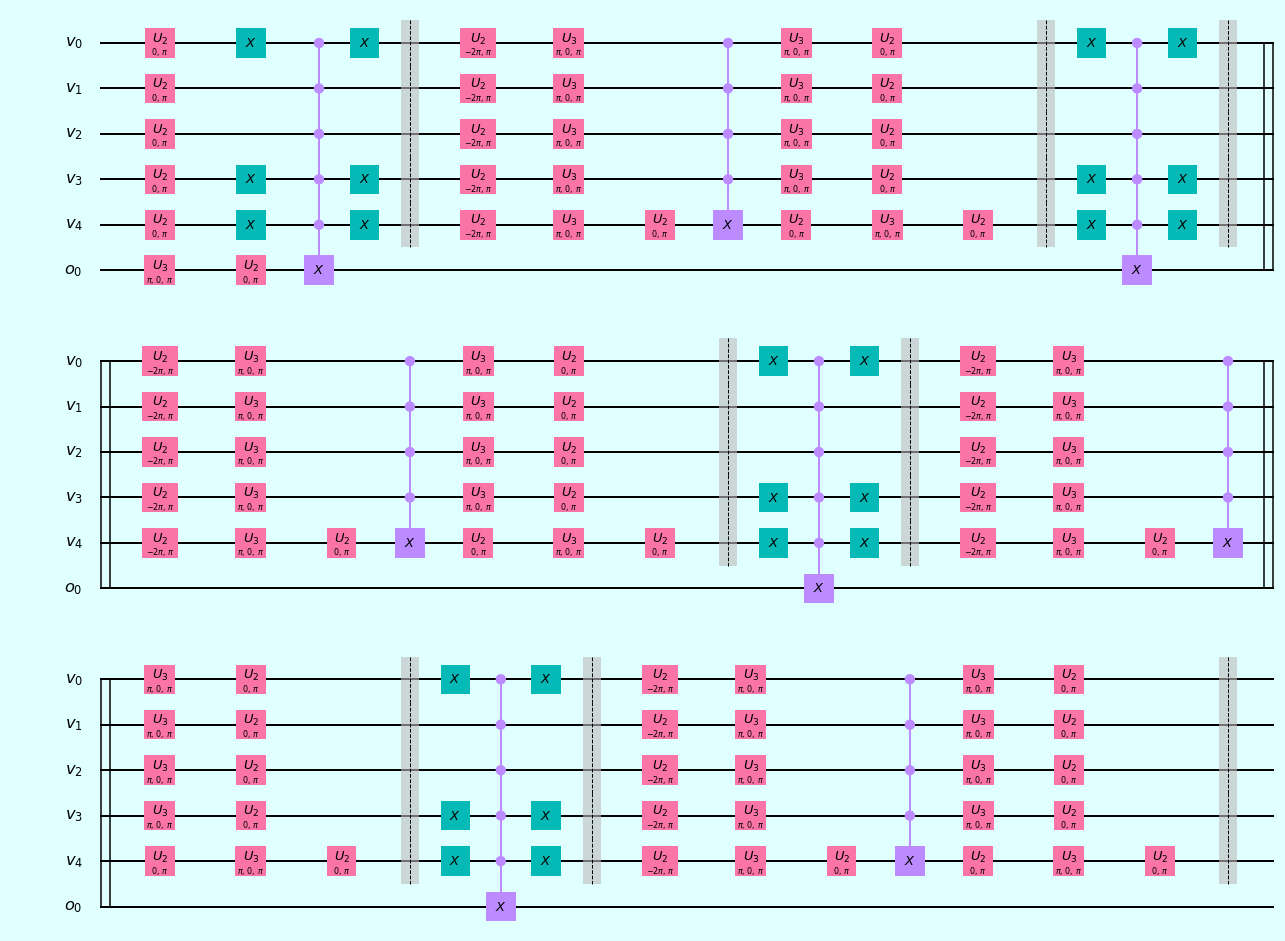

In [69]:
# Let's print out the overall circuit Oracle+Grover
Grover_circuit = algorithm.construct_circuit()
Grover_circuit.draw(output='mpl',style=style)

ibmqfactory.load_account:WARNING:2020-05-12 16:47:39,510: Credentials are already in use. The existing account in the session will be replaced.
The skip Qobj validation does not work for IBMQ provider. Disable it.


The answer is : 00010 , 8 of hearts


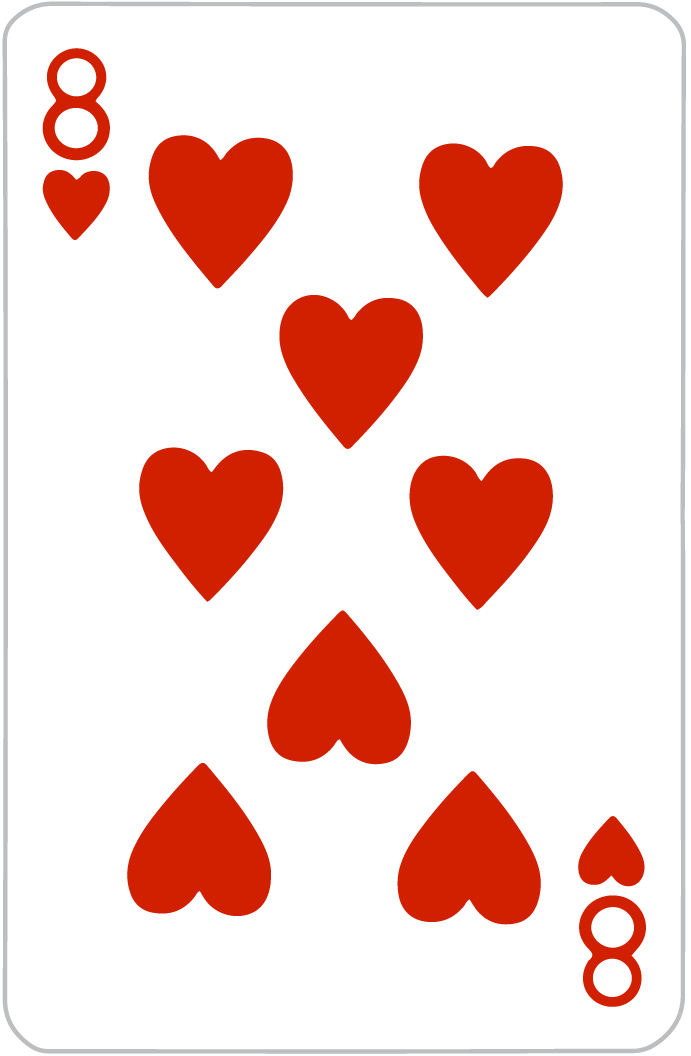

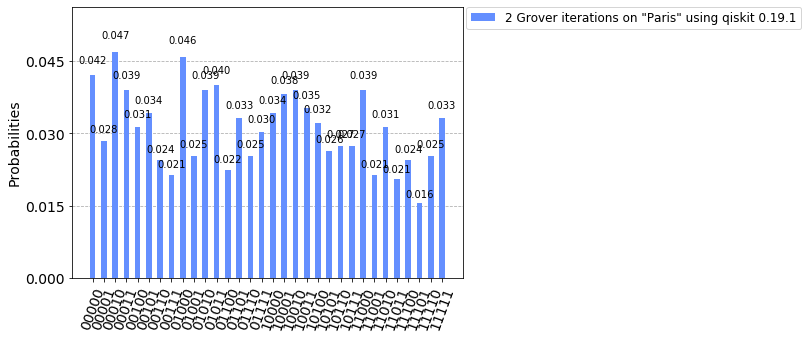

In [70]:
# Grover search 2 iteration 

from qiskit import IBMQ
IBMQ.load_account()
# provider=IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

#backend=provider.get_backend('ibmq_boeblingen')
providerPrivate = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

backend=providerPrivate.get_backend('ibmq_paris')

# invoke Grover algorythm using the Oracle and the number of iterations you define previously
algorithm =Grover(Oracle, mct_mode='noancilla', num_iterations=2)

# execute Grover Algorithm
result_iter1 = algorithm.run(backend)
print('The answer is :',result_iter1['top_measurement'],',', convert_to_card(result_iter1['top_measurement']))

# plot histogram
print_image(result_iter1['top_measurement'])
legend=['2 Grover iterations on "Paris" using qiskit 0.19.1']
plot_histogram(result_iter1['measurement'], legend=legend)

Result of grover (2 iterations on Singapore) using qiskit 0.18.3 
https://quantum-computing.ibm.com/results/5e6909d7322c4000117ab35b
result of grover (2 iterations on "Paris") using qiskit 0.19.1
https://quantum-computing.ibm.com/results/5ebab71807d01400136a39f8

# Adding Measure Error Mitigation 

In [71]:
from qiskit import IBMQ
IBMQ.load_account()
providerPrivate = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')
backend=providerPrivate.get_backend('ibmq_paris')
backend.properties()

ibmqfactory.load_account:WARNING:2020-05-12 16:50:51,445: Credentials are already in use. The existing account in the session will be replaced.


BackendProperties(_gates={'id': {(0,): {'gate_error': (0.00040077835116437293, '2020-05-10T12:47:35Z'), 'gate_length': (3.555555555555556e-08, '2020-05-10T23:16:09Z')}, (1,): {'gate_error': (0.00029863775212175017, '2020-05-10T12:49:20Z'), 'gate_length': (3.555555555555556e-08, '2020-05-10T23:16:09Z')}, (2,): {'gate_error': (0.00018237816180805805, '2020-05-10T12:47:35Z'), 'gate_length': (3.555555555555556e-08, '2020-05-10T23:16:09Z')}, (3,): {'gate_error': (0.0010254495668754803, '2020-05-10T12:49:20Z'), 'gate_length': (3.555555555555556e-08, '2020-05-10T23:16:09Z')}, (4,): {'gate_error': (0.000313582443822826, '2020-05-10T12:47:35Z'), 'gate_length': (3.555555555555556e-08, '2020-05-10T23:16:09Z')}, (5,): {'gate_error': (0.0004235841988381362, '2020-05-10T12:47:35Z'), 'gate_length': (3.555555555555556e-08, '2020-05-10T23:16:09Z')}, (6,): {'gate_error': (0.00027015823458935684, '2020-05-10T12:47:35Z'), 'gate_length': (3.555555555555556e-08, '2020-05-10T23:16:09Z')}, (7,): {'gate_error'

In [74]:
print(Oracle.circuit.qregs[0])
print(Oracle.circuit.qregs[1])


QuantumRegister(5, 'v')
QuantumRegister(1, 'o')


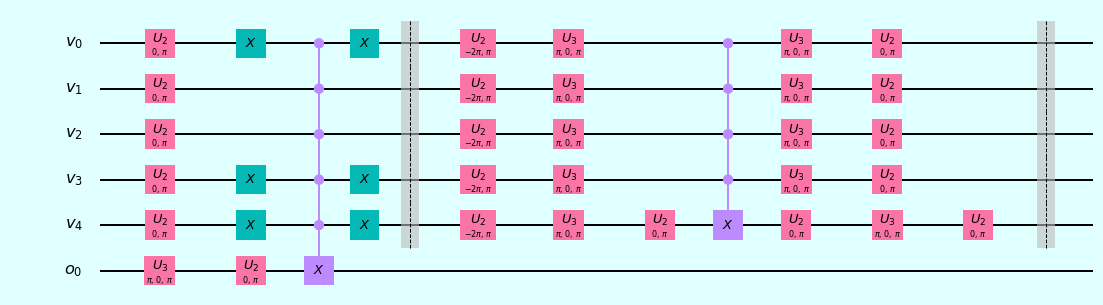

In [75]:
# Let's draw the full Grover circuit when 1 iteration 
algorithm =Grover(Oracle, mct_mode='noancilla', num_iterations=1)
total_circuit=algorithm.construct_circuit(False) # False means we don't add the measure 
total_circuit.draw(output='mpl', style=style)

### The presence of noise errors in the quantum computing.   measurement error mitigation <a id='grover-mitigation'></a>

In [76]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter) 

In [77]:
# using the "total_circuit" 
# total_circuit.qregs[0] means we use 5 qubits
cal_circuits, state_labels = complete_meas_cal(qr = total_circuit.qregs[0], circlabel = 'measerrormitigationcal')

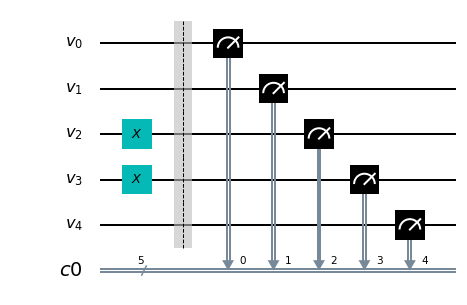

In [78]:
cal_circuits[12].draw(output='mpl')

In [79]:
len(cal_circuits)
# 32 circuits expected as we use 5 qubits

32

In [80]:
#  Execution of the calibration circuits 
from qiskit import execute
from qiskit.tools.monitor import job_monitor 
cal_job = execute(cal_circuits, 
                  backend = backend,
                  shots = 1024,
                  optimization_level = 0 
                  )
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5ebab8552c93fa001485a12f
Job Status: job has successfully run


results of 32 circuits with qiskit 0.18.3 
https://quantum-computing.ibm.com/results/5e690bf2322c4000117ab36d
results of 32 circuits with qiskit 0.19.1
https://quantum-computing.ibm.com/results/5ebab8552c93fa001485a12f

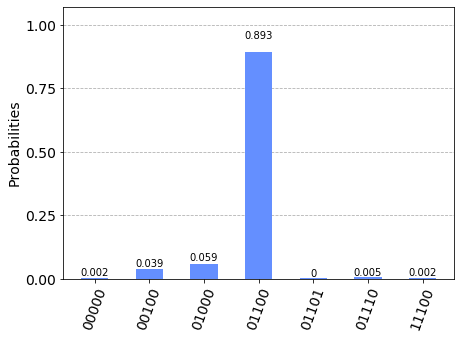

In [81]:
# for example we plot only circuit12 
plot_histogram(
cal_results.get_counts(cal_circuits[12]))

In [82]:
# creation of the calibration matrix 
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

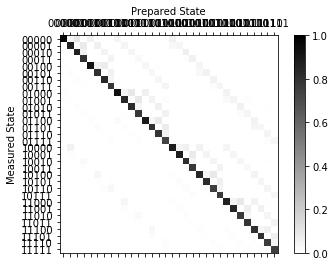

In [83]:
meas_fitter.plot_calibration()

In [84]:
# measurement filter 
meas_filter = meas_fitter.filter
print (meas_filter)


In [85]:
mitigated_result = meas_filter.apply(result_4iter['measurement'])
print (mitigated_result)
# print (list(mitigated_result))


{'00000': 29.430070692116054, '00001': 27.541889068226304, '00010': 27.62435704199466, '00011': 25.872537830364987, '00100': 39.58437452660329, '00101': 38.10171186857584, '00110': 20.09251553304006, '00111': 29.064856298466687, '01000': 33.28779037123796, '01001': 28.665273450292922, '01010': 16.256885250177607, '01011': 25.73951693554096, '01100': 34.80133923109727, '01101': 47.210574688728514, '01110': 11.598420926961083, '01111': 22.8354427803533, '10000': 29.06487038027348, '10001': 75.45203761032387, '10010': 18.308387804501987, '10011': 24.02165916521985, '10100': 32.39985000842677, '10101': 57.218842846923735, '10110': 28.33121702078148, '10111': 31.381359754701904, '11000': 29.423178877378678, '11001': 45.139733513068606, '11010': 35.600875610207076, '11011': 37.8146568924766, '11100': 22.79317356875648, '11101': 51.84582755982787, '11110': 21.794762576476256, '11111': 25.70201031687798}


10001


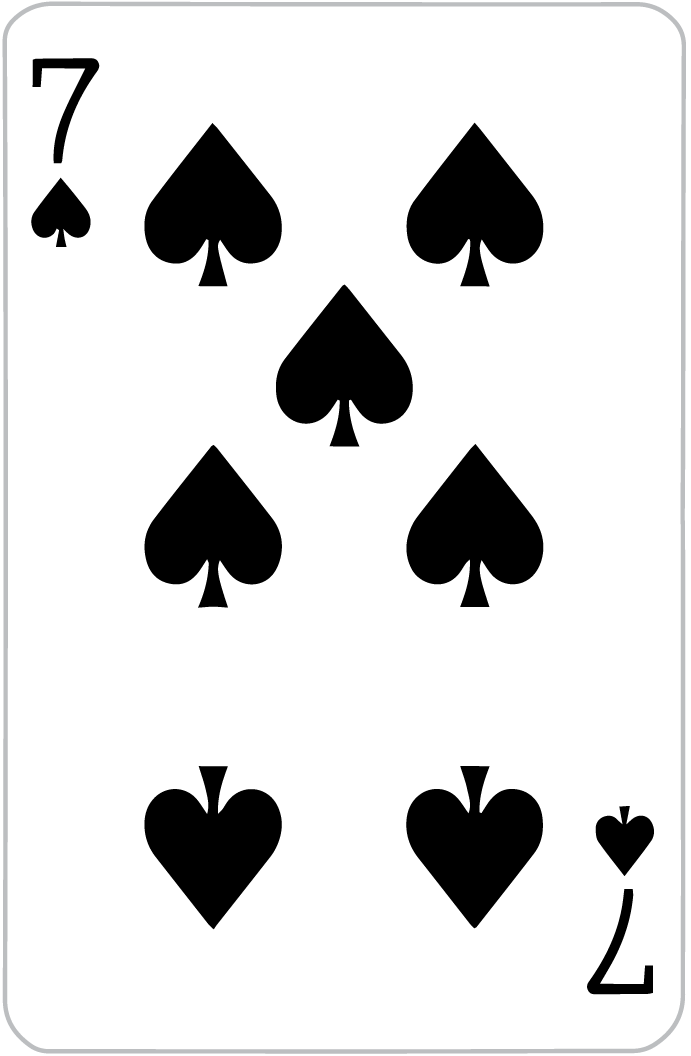

In [86]:
# Let's print out the card found when applying mitigation
# max_key = max(stats, key=lambda k: stats[k])
mitigated_value = max(mitigated_result, key=mitigated_result.get)
print(mitigated_value)
print_image(mitigated_value)

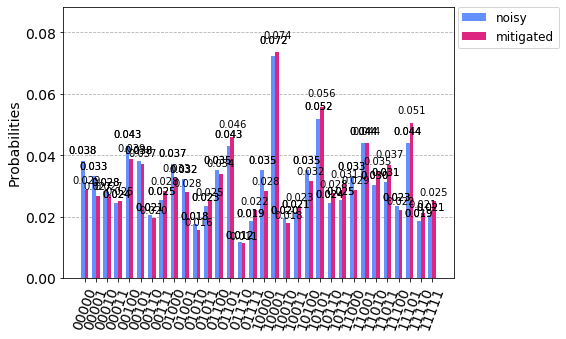

In [87]:
# Plotting the mitigated result and the result with 4 iterations 
plot_histogram([result_4iter['measurement'], mitigated_result], legend=['noisy', 'mitigated'])

In [90]:
# how to check your qiskit version 
import qiskit
qiskit.__qiskit_version__

# How to check qiskit in a version table  
import qiskit.tools.jupyter
%qiskit_version_table